In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import pandas as pd

data_pd_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Depressed/data/depressed.csv")


In [4]:
data_pd_original['no_lasting_investmen'].fillna(data_pd_original['no_lasting_investmen'].median(), inplace=True)

In [5]:
data_pd_original.no_lasting_investmen.isnull().sum()

0

In [6]:
data_pd_original['no_lasting_investmen'] = data_pd_original['no_lasting_investmen'].astype(int)

In [7]:
data_pd_original = data_pd_original.drop(['Survey_id', 'Ville_id'], axis=1)

In [8]:
X = data_pd_original.copy()

In [9]:
X.head()


,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447,0


In [10]:
y = X.depressed.values
X = X.values

In [14]:
X, y

(array([[       1,       28,        1, ..., 28411718, 28292707,        0],
        [       1,       23,        1, ..., 28411718, 28292707,        1],
        [       1,       22,        1, ..., 28411718, 28292707,        0],
        ...,
        [       1,       66,        0, ..., 46444572, 10454478,        1],
        [       1,       51,        1, ..., 28411718, 28292707,        0],
        [       1,       33,        0, ..., 69642126, 13012488,        0]]),
 array([0, 1, 0, ..., 1, 0, 0]))

In [15]:
from sklearn.model_selection import train_test_split

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X, y, test_size=.3)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential() # Creation of the model
model.add(Dense(units= 128, input_dim = 21, activation = 'relu')) # input_dim = Variables or attributes
model.add(Dense(units = 64, activation='relu')) # First activation Layer
model.add(Dense(units = 8, activation='relu')) # Second activation Layer
model.add(Dense(units = 1, activation='sigmoid')) # Sigmoid activation function for binary classification

In [18]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


In [19]:
y_pred_MLP = model.fit(X_train_bayes, y_train_bayes, 
                       validation_data=([X_test_bayes],[y_test_bayes]) ,epochs=150, batch_size=10)

Epoch 1/150
100/100 [==============================] - 3s 6ms/step - loss: 289280.4541 - accuracy: 0.6698 - val_loss: 2.2520 - val_accuracy: 0.8578
Epoch 2/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.8277 - val_loss: 2.0243 - val_accuracy: 0.8578
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.8310 - val_loss: 1.9972 - val_accuracy: 0.8578
Epoch 4/150
100/100 [==============================] - 0s 4ms/step - loss: 0.6201 - accuracy: 0.8136 - val_loss: 1.9734 - val_accuracy: 0.8578
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7960 - val_loss: 1.9517 - val_accuracy: 0.8578
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.8226 - val_loss: 1.9324 - val_accuracy: 0.8578
Epoch 7/150
100/100 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.8237 - val_loss: 1.9156 - val_accuracy: 0

In [20]:
 accuracy = model.evaluate(X_train_bayes, y_train_bayes)
accuracy

32/32 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8240


[0.4648865759372711, 0.8240000009536743]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


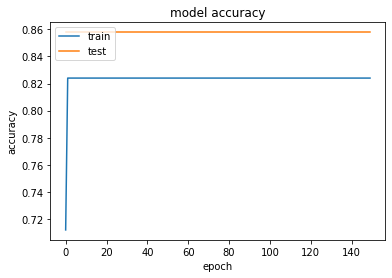

In [22]:
print(y_pred_MLP.history.keys())
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(y_pred_MLP.history['accuracy'])
plt.plot(y_pred_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred_NN = model.predict(X_test_bayes, batch_size=50, verbose=1)

9/9 [==============================] - 0s 1ms/step


In [24]:
y_pred_NN.shape

(429, 1)

In [26]:
import  numpy as np

In [27]:
y_pred_NN_bool = np.argmax(y_pred_NN, axis=1)

In [31]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score,classification_report

In [32]:
cm = confusion_matrix(y_test_bayes, y_pred_NN_bool)
print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_bayes, y_pred_NN_bool, digits=2))

[[369   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       369
           1       0.00      0.00      0.00        60

    accuracy                           0.86       429
   macro avg       0.43      0.50      0.46       429
weighted avg       0.74      0.86      0.80       429



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X_copy = data_pd_original.copy()

In [36]:
y_target = X_copy['depressed'].values

In [37]:
print(y_target)


[0 1 0 ... 1 0 0]


In [39]:
# To Apply the Random Forest Model Again:
X = depression_normalized.values
y = y_target

NameError: ignored